In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [30]:
evaluation_data = pd.read_csv('./results/results_27_05_2022_00_13_02.csv')

# Results Analysis

In [31]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [33]:
evaluation_data.tail(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
890,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_8,207,207,9,14.615673,3543,117,NaN,NaN,7.0,115.0,0.0,0.0,1.0,0,0,0.0
891,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,1,13.906009,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0
892,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,2,14.061872,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0
893,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,3,14.082555,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0
894,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,4,14.056737,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0
895,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,5,13.982061,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0
896,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,6,13.971576,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0
897,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,7,13.998120,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0
898,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,8,14.130498,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0
899,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,190,190,9,13.878583,3246,116,NaN,NaN,7.0,114.0,0.0,0.0,1.0,0,0,0.0


In [43]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [50]:
evaluation_data['DISTRIBUTIONS'] = evaluation_data['Instance'].str.split('_').str[5]
evaluation_data['DISTRIBUTIONS']  = pd.to_numeric(evaluation_data['DISTRIBUTIONS'] )

In [51]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'DISTRIBUTIONS']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs, 'Tree Depth':funcs })
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR', 'TreeDepth_median', 'TreeDepth_IQR']
grouped_multiple.reset_index(inplace = True)

In [52]:
grouped_multiple

,Algorithm,DISTRIBUTIONS,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR,TreeDepth_median,TreeDepth_IQR
0,QuantNaryTreeLearner,2,14.555119,1.663838,3430.5,324.0,117.0,4.0,0.0,0.0,...,0.0,0.0,206.5,5.0,319.5,15.0,0.0,0.0,7.0,1.0
1,QuantNaryTreeLearner,4,10.645410,1.509748,2730.0,261.0,91.5,8.0,0.0,0.0,...,0.0,0.0,199.5,18.0,287.5,25.0,0.0,0.0,5.0,0.0
2,QuantNaryTreeLearner,6,8.516201,1.297712,2527.5,216.0,82.5,5.0,0.0,0.0,...,0.0,0.0,198.0,15.0,279.5,19.0,0.0,0.0,5.0,1.0
3,QuantNaryTreeLearner,8,9.227440,1.282206,2457.0,153.0,83.0,8.0,0.0,0.0,...,0.0,0.0,206.0,4.0,284.5,13.0,0.0,0.0,4.0,0.0
4,QuantNaryTreeLearner,10,7.629970,1.371372,2274.0,114.0,70.0,9.0,0.0,0.0,...,0.0,0.0,201.0,7.0,268.5,17.0,0.0,0.0,4.0,0.0
5,WLStarLearner,2,27.598539,5.439795,7997.0,1072.0,12.0,2.0,0.0,0.0,...,0.0,0.0,206.5,5.0,8006.0,1072.0,0.0,0.0,NaN,NaN
6,WLStarLearner,4,20.859553,5.442748,4787.0,637.0,9.0,2.0,0.0,0.0,...,0.0,0.0,199.5,18.0,4796.0,637.0,0.0,0.0,NaN,NaN
7,WLStarLearner,6,22.049781,8.224943,3753.0,270.0,6.5,1.0,0.0,0.0,...,0.0,0.0,198.0,15.0,3762.0,270.0,0.0,0.0,NaN,NaN
8,WLStarLearner,8,26.555012,7.171909,3463.0,549.0,6.0,1.0,0.0,0.0,...,0.0,0.0,206.0,4.0,3472.0,549.0,0.0,0.0,NaN,NaN
9,WLStarLearner,10,25.968195,7.016622,2966.0,397.0,5.0,0.0,0.0,0.0,...,0.0,0.0,201.0,7.0,2975.0,397.0,0.0,0.0,NaN,NaN


In [53]:
len(grouped_multiple)

10

Text(0, 0.5, 'Learning Time Median (s)')

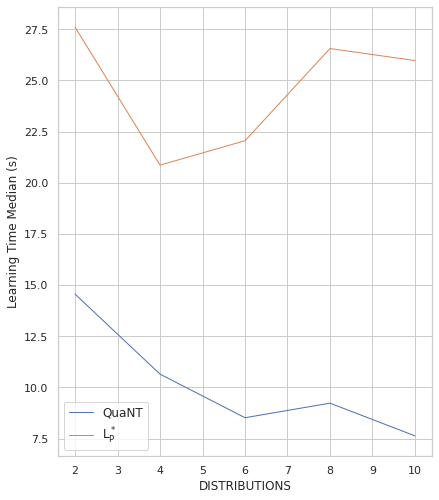

In [55]:
grouped_multiple["LOG_Time(s)_median"] = np.log(grouped_multiple["Time(s)_median"])
grouped_multiple = grouped_multiple.loc[grouped_multiple["Algorithm"] != 'WLStarColLearner' ]

import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
#plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*Col}$", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)

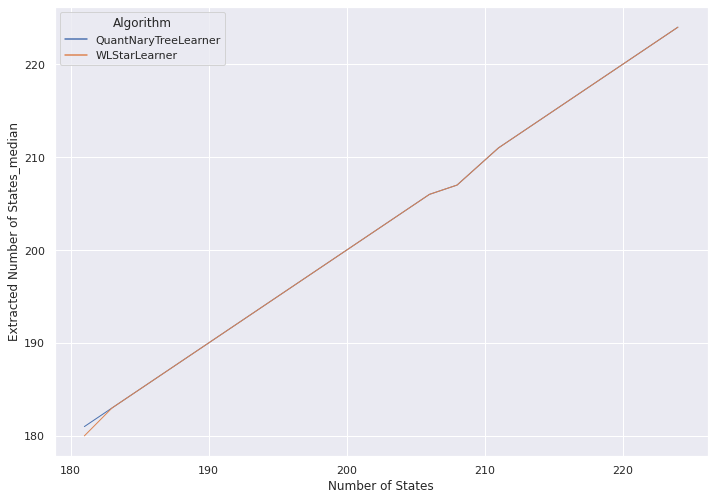

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="Number of States", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)

In [57]:
times_QuaNT = np.array(grouped_multiple["Time(s)_median"][0:10])
times_WLStar = np.array(grouped_multiple["Time(s)_median"][10:])
speedup_Q_WL = times_WLStar / times_QuaNT
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})

sns.set_style("whitegrid")
ax = sns.lineplot(x=grouped_multiple['Number of States'][0:23], y=speedup_Q_WL,  linewidth=1)
plt.legend(labels=["QuaNT Speedup"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)

ValueError: operands could not be broadcast together with shapes (0,) (10,) 

Text(0, 0.5, 'Structure Size Median')

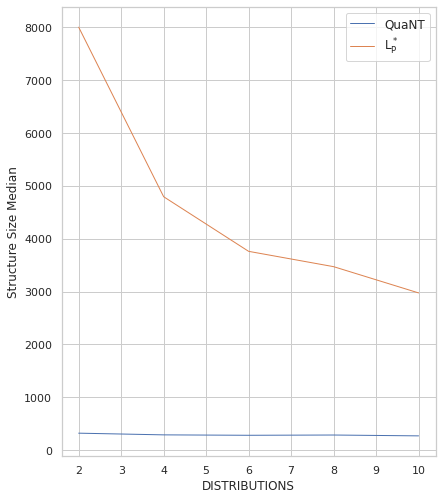

In [58]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Structure Size Median", fontsize = 12)

# Tree Depth Analysis

In [59]:
evaluation_data_Quant = evaluation_data.loc[evaluation_data["Algorithm"] == 'QuantNaryTreeLearner' ]
evaluation_data_Quant.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time (s)', 'LastTokenQuery',
       'EquivalenceQuery', 'OT Prefixes', 'OT Suffixes', 'Tree Depth',
       'Inner Nodes', 'LogProbError', 'WER', 'NDCG', 'OOPartition',
       'OOTolerance', 'AbsoluteError', 'DISTRIBUTIONS', 'OT_SIZE', 'TREE_SIZE',
       'STRUCTURE_SIZE'],
      dtype='object')

In [60]:
evaluation_data_Quant['Tree Depth'].value_counts()

4.0    207
5.0    162
7.0     54
6.0     18
8.0      9
Name: Tree Depth, dtype: int64

Text(0, 0.5, 'Tree Depth')

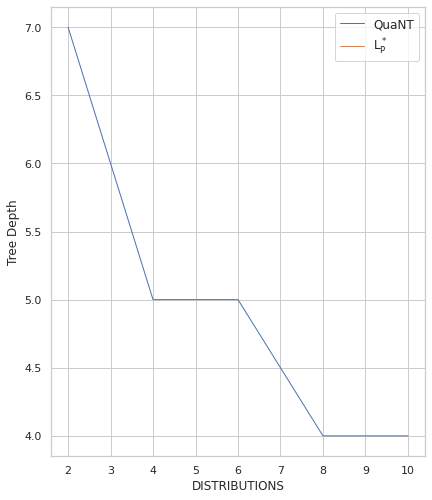

In [61]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="TreeDepth_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Tree Depth", fontsize = 12)